# 2024-07-02 PP4r2 RNAi plotting

- This notebook plots the data for Supplemental figure 2G and 2H.
- The data is found in the excel sheet titled `2024-07-02 PP4r2 RNAi.xlsx`.
- The data was manually annotated in imaris and recorded/calculated in excel.
- The WT data used as the control variable is the same data as shown in Figure 1.
- These values are then plotted using `seaborn` `stripplots` and `boxplots`.
- Statistical tests are done and recorded in a summary table at the end of the notebook.  

In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Supp Fig1'

In [3]:
ls

2024-07-02 PP4r2.ipynb          figs/
2024-10-03 Flfl analysis.ipynb  output/
data/


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/Supp Fig1' # home directory
figs_dir = home_dir + '/figs/' # directory to hold the figure output
data_dir = home_dir + '/data/' # directory holding the data
outs_dir = home_dir + '/output/' # directory to save any output csv files to 

In [5]:
# reading in the data
os.chdir(data_dir)
data = pd.read_excel('2024-07-02 PP4r2 RNAi.xlsx')
data

,file name,Nb,genotype,frame,phase,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,Unnamed: 12,AC/Cyto RFP,BC/Cyto RFP,AC/BC RFP
0,RCS PP4r2 RNAi_2024-03-26_F0_ANNOTATED,31.0,"PP4r2 RNAi, 0X MTOC",1.0,prometaphase,598.0,585.0,282.0,NaN,498.0,485.0,182.0,NaN,2.736264,2.664835,1.026804
1,NaN,31.0,"PP4r2 RNAi, 0X MTOC",11.0,interphase,198.0,217.0,197.0,NaN,98.0,117.0,97.0,NaN,1.010309,1.206186,0.837607
2,NaN,33.0,"PP4r2 RNAi, 0X MTOC",3.0,prometaphase,393.0,325.0,212.0,NaN,293.0,225.0,112.0,NaN,2.616071,2.008929,1.302222
3,NaN,33.0,"PP4r2 RNAi, 0X MTOC",9.0,interphase,197.0,191.0,191.0,NaN,97.0,91.0,91.0,NaN,1.065934,1.000000,1.065934
4,RCS PP4r2 RNAi_2024-03-26_F1_ANNOTATED,39.0,"PP4r2 RNAi, 0X MTOC",1.0,prometaphase,432.0,554.0,297.0,NaN,332.0,454.0,197.0,NaN,1.685279,2.304569,0.731278
5,NaN,39.0,"PP4r2 RNAi, 0X MTOC",9.0,interphase,183.0,169.0,252.0,NaN,83.0,69.0,152.0,NaN,0.546053,0.453947,1.202899
6,NaN,43.0,"PP4r2 RNAi, 0X MTOC",7.0,prometaphase,675.0,393.0,317.0,NaN,575.0,293.0,217.0,NaN,2.649770,1.350230,1.962457
7,NaN,43.0,"PP4r2 RNAi, 0X MTOC",13.0,interphase,289.0,295.0,225.0,NaN,189.0,195.0,125.0,NaN,1.512000,1.560000,0.969231
8,NaN,45.0,"PP4r2 RNAi, 0X MTOC",2.0,prometaphase,469.0,407.0,190.0,NaN,369.0,307.0,90.0,NaN,4.100000,3.411111,1.201954
9,NaN,45.0,"PP4r2 RNAi, 0X MTOC",11.0,interphase,218.0,183.0,218.0,NaN,118.0,83.0,118.0,NaN,1.000000,0.703390,1.421687


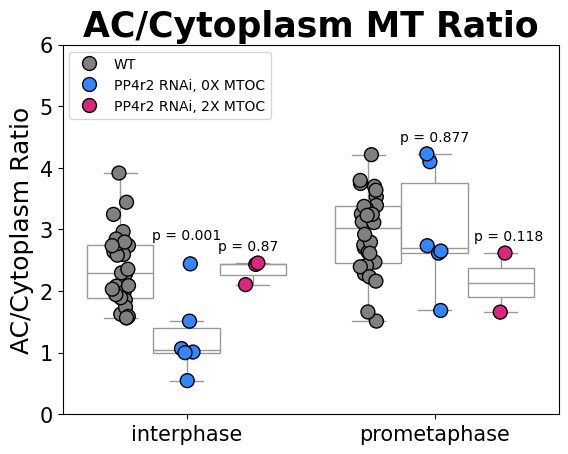

In [6]:
# plotting

p = ['grey', '#3386FF', '#DC267F']
point_size = 10
tick_size = 15
title_size = 25
axis_size = 18

sns.stripplot(data = data, x = 'phase', y = 'AC/Cyto RFP', hue = 'genotype',
             order = ['interphase', 'prometaphase'], hue_order = ['WT', 'PP4r2 RNAi, 0X MTOC', 'PP4r2 RNAi, 2X MTOC'],
             size = point_size, edgecolor = 'k', linewidth = 1, palette = p,
              dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/Cyto RFP', hue = 'genotype',
             order = ['interphase', 'prometaphase'], hue_order = ['WT', 'PP4r2 RNAi, 0X MTOC', 'PP4r2 RNAi, 2X MTOC'],
             palette = ['w','w','w'],
              dodge = True, legend = False)

plt.ylim(0,6)
plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.title('AC/Cytoplasm MT Ratio', fontsize = title_size, fontweight = 'bold')
plt.ylabel('AC/Cytoplasm Ratio', fontsize = axis_size)
plt.xlabel('')

# stats, interphase WT vs 0X
param1 = data[(data['phase']=='interphase') & (data['genotype']=='WT')]['AC/Cyto RFP']
param2 = data[(data['phase']=='interphase') & (data['genotype']=='PP4r2 RNAi, 0X MTOC')]['AC/Cyto RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0, param2.max()+0.4), ha = 'center')

# stats, interphase WT vs 2X
param1 = data[(data['phase']=='interphase') & (data['genotype']=='WT')]['AC/Cyto RFP']
param2 = data[(data['phase']=='interphase') & (data['genotype']=='PP4r2 RNAi, 2X MTOC')]['AC/Cyto RFP']
b = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {b}", xy = (0.25, param2.max()+0.2), ha = 'center')

# stats, prometa WT vs 0X
param1 = data[(data['phase']=='prometaphase') & (data['genotype']=='WT')]['AC/Cyto RFP'].dropna()
param2 = data[(data['phase']=='prometaphase') & (data['genotype']=='PP4r2 RNAi, 0X MTOC')]['AC/Cyto RFP'].dropna()
c = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {c}", xy = (1, param2.max()+0.2), ha = 'center')

# stats, prometa WT vs 2X
param1 = data[(data['phase']=='prometaphase') & (data['genotype']=='WT')]['AC/Cyto RFP'].dropna()
param2 = data[(data['phase']=='prometaphase') & (data['genotype']=='PP4r2 RNAi, 2X MTOC')]['AC/Cyto RFP'].dropna()
d = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {d}", xy = (1.3, param2.max()+0.2), ha = 'center')

plt.legend(loc = 'upper left')

os.chdir(figs_dir)

plt.savefig('pp4r2_rnai_plot.svg', dpi = 900, bbox_inches = 'tight')
plt.savefig('pp4r2_rnai_plot.png', dpi = 900, bbox_inches = 'tight')
plt.show();

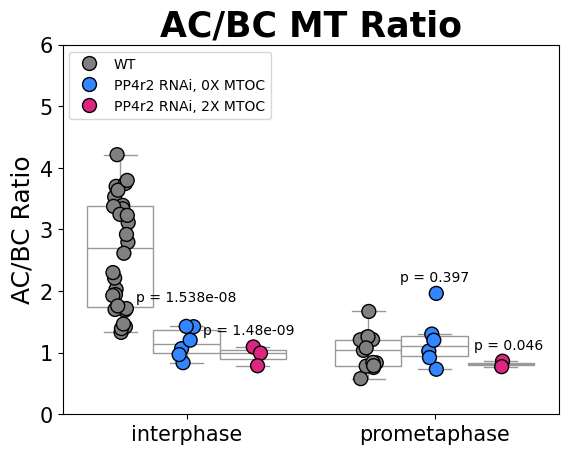

In [7]:
# plotting

p = ['grey', '#3386FF', '#DC267F']
point_size = 10
tick_size = 15
title_size = 25
axis_size = 18

sns.stripplot(data = data, x = 'phase', y = 'AC/BC RFP', hue = 'genotype',
             order = ['interphase', 'prometaphase'], hue_order = ['WT', 'PP4r2 RNAi, 0X MTOC', 'PP4r2 RNAi, 2X MTOC'],
             size = point_size, edgecolor = 'k', linewidth = 1, palette = p,
              dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/BC RFP', hue = 'genotype',
             order = ['interphase', 'prometaphase'], hue_order = ['WT', 'PP4r2 RNAi, 0X MTOC', 'PP4r2 RNAi, 2X MTOC'],
             palette = ['w','w','w'],
              dodge = True, legend = False)

plt.ylim(0,6)
plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.title('AC/BC MT Ratio', fontsize = title_size, fontweight = 'bold')
plt.ylabel('AC/BC Ratio', fontsize = axis_size)
plt.xlabel('')

# stats, interphase WT vs 0X
param1 = data[(data['phase']=='interphase') & (data['genotype']=='WT')]['AC/BC RFP']
param2 = data[(data['phase']=='interphase') & (data['genotype']=='PP4r2 RNAi, 0X MTOC')]['AC/BC RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 11)
plt.annotate(f"p = {a}", xy = (0, param2.max()+0.4), ha = 'center')

# stats, interphase WT vs 2X
param1 = data[(data['phase']=='interphase') & (data['genotype']=='WT')]['AC/BC RFP']
param2 = data[(data['phase']=='interphase') & (data['genotype']=='PP4r2 RNAi, 2X MTOC')]['AC/BC RFP']
b = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 11)
plt.annotate(f"p = {b}", xy = (0.25, param2.max()+0.2), ha = 'center')

# stats, prometa WT vs 0X
param1 = data[(data['phase']=='prometaphase') & (data['genotype']=='WT')]['AC/BC RFP'].dropna()
param2 = data[(data['phase']=='prometaphase') & (data['genotype']=='PP4r2 RNAi, 0X MTOC')]['AC/BC RFP'].dropna()
c = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {c}", xy = (1, param2.max()+0.2), ha = 'center')

# stats, prometa WT vs 2X
param1 = data[(data['phase']=='prometaphase') & (data['genotype']=='WT')]['AC/BC RFP'].dropna()
param2 = data[(data['phase']=='prometaphase') & (data['genotype']=='PP4r2 RNAi, 2X MTOC')]['AC/BC RFP'].dropna()
d = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {d}", xy = (1.3, param2.max()+0.2), ha = 'center')

plt.legend(loc = 'upper left')

os.chdir(figs_dir)

plt.savefig('pp4r2_rnai_plot_ac_bc.svg', dpi = 900, bbox_inches = 'tight')
plt.savefig('pp4r2_rnai_plot_ac_bc.png', dpi = 900, bbox_inches = 'tight')
plt.show();

## Statistical Table

In [8]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [9]:
data.head(5)

,file name,Nb,genotype,frame,phase,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,Unnamed: 12,AC/Cyto RFP,BC/Cyto RFP,AC/BC RFP
0,RCS PP4r2 RNAi_2024-03-26_F0_ANNOTATED,3.10E+01,"PP4r2 RNAi, 0X MTOC",1.00E+00,prometaphase,5.98E+02,5.85E+02,2.82E+02,NaN,4.98E+02,4.85E+02,1.82E+02,NaN,2.74E+00,2.66E+00,1.03E+00
1,NaN,3.10E+01,"PP4r2 RNAi, 0X MTOC",1.10E+01,interphase,1.98E+02,2.17E+02,1.97E+02,NaN,9.80E+01,1.17E+02,9.70E+01,NaN,1.01E+00,1.21E+00,8.38E-01
2,NaN,3.30E+01,"PP4r2 RNAi, 0X MTOC",3.00E+00,prometaphase,3.93E+02,3.25E+02,2.12E+02,NaN,2.93E+02,2.25E+02,1.12E+02,NaN,2.62E+00,2.01E+00,1.30E+00
3,NaN,3.30E+01,"PP4r2 RNAi, 0X MTOC",9.00E+00,interphase,1.97E+02,1.91E+02,1.91E+02,NaN,9.70E+01,9.10E+01,9.10E+01,NaN,1.07E+00,1.00E+00,1.07E+00
4,RCS PP4r2 RNAi_2024-03-26_F1_ANNOTATED,3.90E+01,"PP4r2 RNAi, 0X MTOC",1.00E+00,prometaphase,4.32E+02,5.54E+02,2.97E+02,NaN,3.32E+02,4.54E+02,1.97E+02,NaN,1.69E+00,2.30E+00,7.31E-01


In [10]:
# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'PP4r2 RNAi, 0X MTOC', 'interphase', 'AC/Cyto RFP']
t2 = ['WT', 'PP4r2 RNAi, 0X MTOC', 'prometaphase', 'AC/Cyto RFP']
t3 = ['WT', 'PP4r2 RNAi, 0X MTOC', 'interphase', 'AC/BC RFP']
t4 = ['WT', 'PP4r2 RNAi, 0X MTOC', 'prometaphase', 'AC/BC RFP']

t5 = ['WT', 'PP4r2 RNAi, 2X MTOC', 'interphase', 'AC/Cyto RFP']
t6 = ['WT', 'PP4r2 RNAi, 2X MTOC', 'prometaphase', 'AC/Cyto RFP']
t7 = ['WT', 'PP4r2 RNAi, 2X MTOC', 'interphase', 'AC/BC RFP']
t8 = ['WT', 'PP4r2 RNAi, 2X MTOC', 'prometaphase', 'AC/BC RFP']


tests = [t1, t2, t3, t4, t5, t6, t7, t8]

In [11]:
for i in range(0, len(tests)):
    stats_table.loc[i, 'control variable'] = tests[i][0]
    stats_table.loc[i, 'experimental variable'] = tests[i][1]
    stats_table.loc[i, 'phase'] = tests[i][2]
    stats_table.loc[i, 'y-value'] = tests[i][3]
    
    param1 = data[(data['genotype']==tests[i][0]) & (data['phase']==tests[i][2])][tests[i][3]].dropna()
    param2 = data[(data['genotype']==tests[i][1]) & (data['phase']==tests[i][2])][tests[i][3]].dropna()

    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)

    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()

    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    test = independent_ttest(param1, param2, 0.05)
    stats_table.loc[i, 'test statistic'] = test[0]
    stats_table.loc[i, 'degrees of freedom'] = test[1]
    stats_table.loc[i, 'critical value'] = test[2]
    stats_table.loc[i, 'p-value'] = test[3]


    if test[3] < 0.0001:
        sig = "****"
    elif test[3] < 0.001:
        sig = "***"
    elif test[3] < 0.01:
        sig = "**"
    elif test[3] < 0.05:
        sig = "*"
    elif test[3] > 0.05:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig
    
stats_table['test'] = "Unpaired Student's T-test"
stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,"PP4r2 RNAi, 0X MTOC",interphase,Unpaired Student's T-test,AC/Cyto RFP,28,6,2.36E+00,1.26E+00,6.06E-01,6.54E-01,3.77E+00,32,1.69E+00,6.69E-04,***
1,WT,"PP4r2 RNAi, 0X MTOC",prometaphase,Unpaired Student's T-test,AC/Cyto RFP,28,6,2.94E+00,3.00E+00,6.56E-01,9.78E-01,-1.56E-01,32,1.69E+00,8.77E-01,ns
2,WT,"PP4r2 RNAi, 0X MTOC",interphase,Unpaired Student's T-test,AC/BC RFP,28,6,2.63E+00,1.15E+00,8.99E-01,2.41E-01,7.50E+00,32,1.69E+00,1.54E-08,****
3,WT,"PP4r2 RNAi, 0X MTOC",prometaphase,Unpaired Student's T-test,AC/BC RFP,13,6,1.02E+00,1.19E+00,2.95E-01,4.29E-01,-8.68E-01,17,1.74E+00,3.97E-01,ns
4,WT,"PP4r2 RNAi, 2X MTOC",interphase,Unpaired Student's T-test,AC/Cyto RFP,28,3,2.36E+00,2.33E+00,6.06E-01,1.96E-01,1.65E-01,29,1.70E+00,8.70E-01,ns
5,WT,"PP4r2 RNAi, 2X MTOC",prometaphase,Unpaired Student's T-test,AC/Cyto RFP,28,2,2.94E+00,2.14E+00,6.56E-01,6.78E-01,1.61E+00,28,1.70E+00,1.18E-01,ns
6,WT,"PP4r2 RNAi, 2X MTOC",interphase,Unpaired Student's T-test,AC/BC RFP,28,3,2.63E+00,9.58E-01,8.99E-01,1.56E-01,8.68E+00,29,1.70E+00,1.48E-09,****
7,WT,"PP4r2 RNAi, 2X MTOC",prometaphase,Unpaired Student's T-test,AC/BC RFP,13,2,1.02E+00,8.17E-01,2.95E-01,6.29E-02,2.21E+00,13,1.77E+00,4.58E-02,*


In [12]:
# saves output stats table
os.chdir(outs_dir)
stats_table.to_csv('PP4r2 RNAi stats.csv')
os.chdir(home_dir)